# House Price Prediction Based on Area

This notebook implements house price prediction using only the area feature with gradient descent and tracks training accuracy over epochs.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

Bringing in essential libraries:
- `pandas`, `numpy` → handle dataset manipulation and numeric computations  
- `matplotlib.pyplot` → plotting results and training metrics  
- `train_test_split` → split dataset into train/test for unbiased evaluation  
- `mean_squared_error`, `r2_score`, `mean_absolute_error` → regression metrics  
- `StandardScaler` → normalize `area` feature so gradient descent converges faster and avoids scale issues  


## Configuration

In [2]:
csv_path = 'Housing.csv'
learning_rate = 0.01
epochs = 1000
print_every = 100

Define important constants:
- `csv_path`: file path to the housing dataset  
- `learning_rate`: GD step size controlling how big parameter updates are  
- `epochs`: number of training iterations  

## Load and Prepare Data
Read housing data from `Housing.csv` using pandas:
- Print dataset shape (rows × columns)  
- Show first few rows with `.head()` to check if columns (`area`, `price`) exist and are correctly loaded  


In [3]:
# Load data
df = pd.read_csv(csv_path)
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (545, 13)

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(df[['area', 'price']].describe())

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Basic statistics:
               area         price
count    545.000000  5.450000e+02
mean    5150.541284  4.766729e+06
std     2170.141023  1.870440e+06
min     1650.000000  1.750000e+06
25%     3600.000000  3.430000e+06
50%     4600.000000  4.340000e+06
75%     6360.000000  5.740000e+06
max    16200.000000  1.330000e+07


Quick quality check:
- `.isnull().sum()` → confirm no missing values in key columns  
- `.describe()` → check ranges, mean, std for `area` and `price`  
- Ensures the data looks reasonable (e.g., no negative areas or extreme outliers)  


In [5]:
# Prepare features and target - AREA ONLY
X = df[['area']].values  # Only area feature
y = df['price'].values

print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

Feature shape: (545, 1)
Target shape: (545,)


Prepare variables for regression:
- `X = dataset["area"]` → input feature  
- `y = dataset["price"]` → prediction target  
This keeps the problem a **univariate linear regression**.  


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 436 samples
Test set: 109 samples


Split dataset:
- 80% train, 20% test  
- `random_state=42` ensures reproducibility  
- Print how many samples end up in train vs test to verify distribution  


In [7]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Flatten for easier computation
X_train_norm = X_train_scaled.flatten()
X_test_norm = X_test_scaled.flatten()

Since `area` can be large (e.g., hundreds/thousands), scaling helps:
- Fit `StandardScaler` on training data  
- Transform both train/test with same scaler (avoids data leakage)  
- Flatten arrays into 1D so we can apply custom GD without reshaping overhead  


## Gradient Descent Implementation
Initialize gradient descent:
- Parameters: `m` (slope) and `c` (intercept)  
- Create lists to track: loss (MSE), R², and parameter values across epochs  
- Define helper function for R² since we want to monitor goodness-of-fit during training (not just after)  


In [9]:
# Initialize parameters
m = 0.0  # slope
c = 0.0  # intercept
n = len(X_train_norm)

# History tracking
loss_history = []
r2_history = []
accuracy_history = []  # We'll use R² as accuracy metric
m_history = []
c_history = []

def r2_score_manual(y_true, y_pred):
    """Manual R² calculation"""
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

print("Starting gradient descent training...")

Starting gradient descent training...


In [10]:
# Gradient Descent loop
for epoch in range(epochs):
    # Predictions
    y_pred_epoch = m * X_train_norm + c
    error = y_train - y_pred_epoch
    
    # Gradients
    dm = -(2.0 / n) * np.sum(X_train_norm * error)
    dc = -(2.0 / n) * np.sum(error)
    
    # Update parameters
    m = m - learning_rate * dm
    c = c - learning_rate * dc
    
    # Compute metrics
    mse_epoch = np.mean(error ** 2)
    r2_epoch = r2_score_manual(y_train, y_pred_epoch)
    
    # Store histories
    loss_history.append(mse_epoch)
    r2_history.append(r2_epoch)
    accuracy_history.append(r2_epoch)  # Using R² as accuracy
    m_history.append(m)
    c_history.append(c)
    
    # Print progress
    if (epoch % print_every == 0) or (epoch == epochs - 1):
        print(f"Epoch {epoch:4d} | MSE = {mse_epoch:.2f} | R² = {r2_epoch:.4f} | m = {m:.6f} | c = {c:.2f}")

print("\nTraining completed!")

Epoch    0 | MSE = 25234792406487.61 | R² = -7.1841 | m = 18747.305901 | c = 94130.55
Epoch  100 | MSE = 2609790036623.44 | R² = 0.1536 | m = 815538.585277 | c = 4094833.37
Epoch  200 | MSE = 2211862702987.95 | R² = 0.2827 | m = 921208.690888 | c = 4625404.80
Epoch  300 | MSE = 2204863978291.01 | R² = 0.2849 | m = 935222.613366 | c = 4695768.94
Epoch  400 | MSE = 2204740885094.73 | R² = 0.2850 | m = 937081.133541 | c = 4705100.61
Epoch  500 | MSE = 2204738720138.17 | R² = 0.2850 | m = 937327.609661 | c = 4706338.17
Epoch  600 | MSE = 2204738682061.03 | R² = 0.2850 | m = 937360.297215 | c = 4706502.29
Epoch  700 | MSE = 2204738681391.33 | R² = 0.2850 | m = 937364.632224 | c = 4706524.06
Epoch  800 | MSE = 2204738681379.55 | R² = 0.2850 | m = 937365.207131 | c = 4706526.94
Epoch  900 | MSE = 2204738681379.34 | R² = 0.2850 | m = 937365.283375 | c = 4706527.33
Epoch  999 | MSE = 2204738681379.34 | R² = 0.2850 | m = 937365.293455 | c = 4706527.38

Training completed!


For each epoch:
1. Predict: `y_pred = m*X + c`  
2. Compute error = `y_pred - y`  
3. Calculate gradients:  
   - `dm = (2/n) * sum(error * X)`  
   - `dc = (2/n) * sum(error)`  
4. Update params: `m -= lr * dm`, `c -= lr * dc`  
5. Track metrics (MSE, R²) and store parameter history  
6. Print progress every `print_every` epochs  


## Model Evaluation
After training, evaluate on the test set:
- `MSE` (average squared error)  
- `R²` (variance explained by model)  
- `MAE` (average absolute error)  
- Also print final slope `m` and intercept `c`  


In [11]:
# Test set predictions
y_pred_test = m * X_test_norm + c

# Calculate test metrics
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("=== Final Model Performance ===")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Final parameters: m = {m:.6f}, c = {c:.2f}")

=== Final Model Performance ===
Test MSE: 3675286610877.43
Test R²: 0.2729
Test MAE: 1474748.13
Final parameters: m = 937365.293455, c = 4706527.38


## Visualization: Epoch vs Accuracy Graph
Use 4 subplots to show training dynamics:
1. Epoch vs R² → shows goodness-of-fit improving  
2. Epoch vs MSE → shows error decreasing  
3. Parameter evolution → how `m` and `c` converge  
4. Test scatter → actual vs predicted prices, with a diagonal line for perfect predictions  


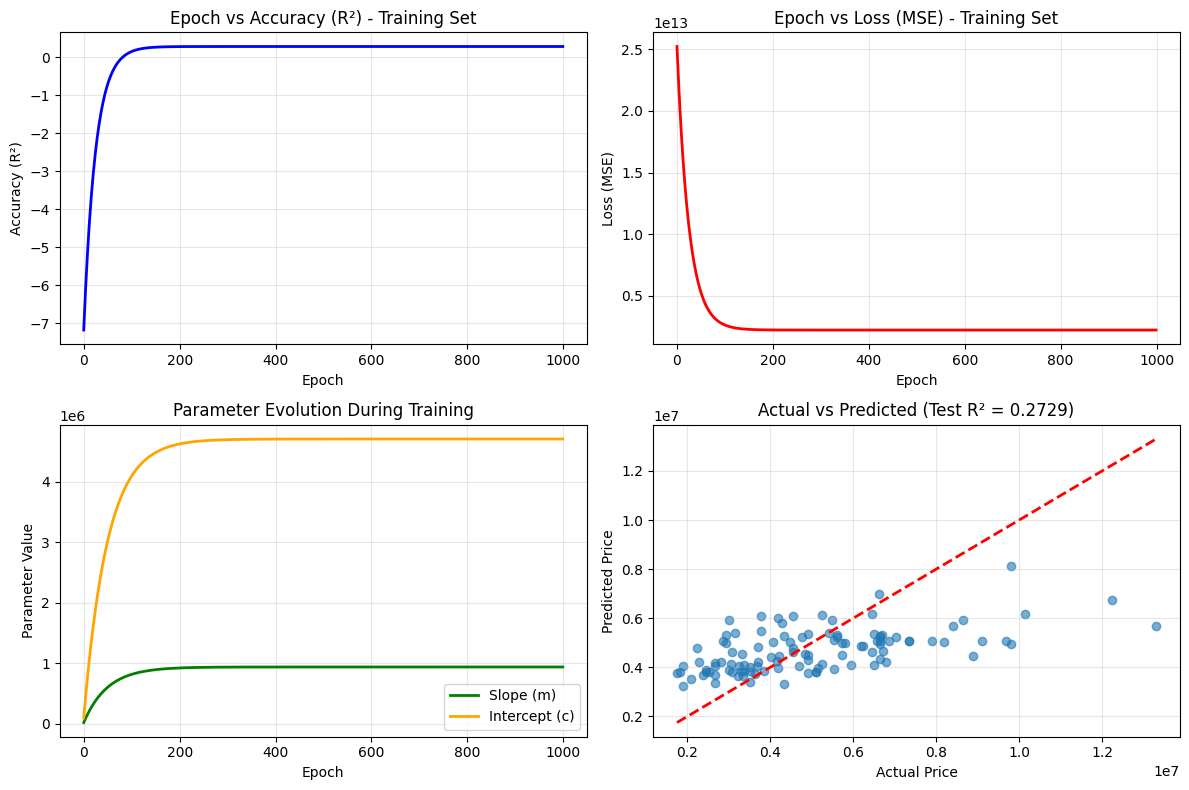

In [12]:
# Create epoch vs accuracy graph
epochs_range = np.arange(epochs)

plt.figure(figsize=(12, 8))

# Subplot 1: Epoch vs Accuracy (R²)
plt.subplot(2, 2, 1)
plt.plot(epochs_range, accuracy_history, 'b-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy (R²)')
plt.title('Epoch vs Accuracy (R²) - Training Set')
plt.grid(True, alpha=0.3)

# Subplot 2: Epoch vs Loss (MSE)
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss_history, 'r-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Epoch vs Loss (MSE) - Training Set')
plt.grid(True, alpha=0.3)

# Subplot 3: Parameter evolution
plt.subplot(2, 2, 3)
plt.plot(epochs_range, m_history, 'g-', label='Slope (m)', linewidth=2)
plt.plot(epochs_range, c_history, 'orange', label='Intercept (c)', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Parameter Value')
plt.title('Parameter Evolution During Training')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 4: Actual vs Predicted (Test Set)
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted (Test R² = {test_r2:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Feature vs Target Visualization
Final regression line visualization:
- Scatter: train (blue) and test (green) points in original `area` vs `price` scale  
- Regression line:  
  - Generate evenly spaced `area` values  
  - Scale them with `StandardScaler`  
  - Predict with final `m`, `c`  
  - Inverse transform back to original scale  
  - Plot line to show model fit against data  

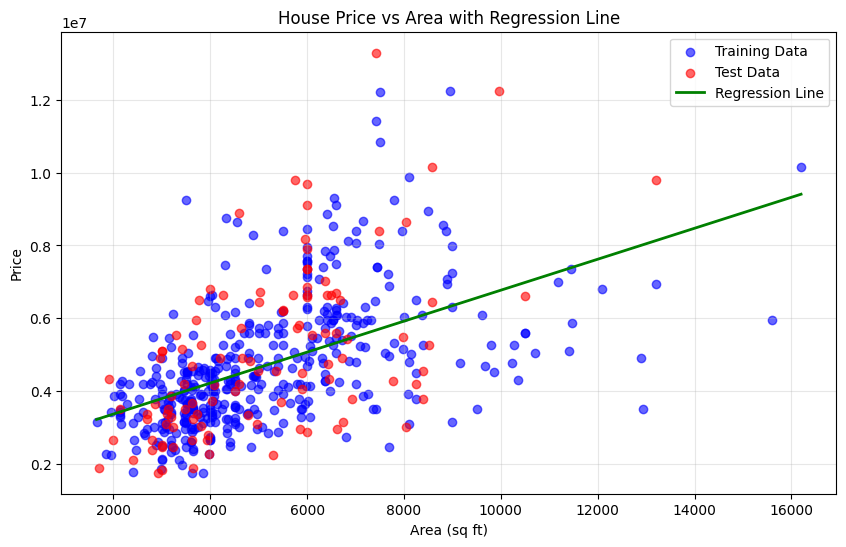

In [13]:
# Plot area vs price with regression line
plt.figure(figsize=(10, 6))

# Scatter plot of training data
plt.scatter(X_train.flatten(), y_train, alpha=0.6, label='Training Data', color='blue')
plt.scatter(X_test.flatten(), y_test, alpha=0.6, label='Test Data', color='red')

# Plot regression line
area_range = np.linspace(X.min(), X.max(), 100)
area_range_norm = scaler.transform(area_range.reshape(-1, 1)).flatten()
price_pred_line = m * area_range_norm + c

plt.plot(area_range, price_pred_line, 'g-', linewidth=2, label='Regression Line')

plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('House Price vs Area with Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()